## Imports des librairies

In [1]:
# librairies générales
import pandas as pd
import numpy as np

# librairies pour visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot, heatmap

## Import des données

Les données ont été importées en format CSV, puis manipulées à l'aide d'un tableur.<br/>
On importe ici une version déjà écrémée avec uniquement les données pertinentes et sous forme quantitative.

In [2]:
df = pd.read_csv('df.csv')

Explorons les données :

In [3]:
df.head()

,code_ISO,pays,conso_vol_hab,ratio_vol,imp_vol_hab,pib_hab,pol,pop,km
0,AFG,Afghanistan,"1,52","0,18","0,80","584,39","-2,76",36296113,4909
1,ZAF,Afrique du Sud,"35,70","0,59","9,02","6189,29","-0,23",57009756,8851
2,ALB,Albanie,"16,30","0,35","13,18","4543,39","0,37",2884169,1522
3,DZA,Algérie,"6,38","0,35","0,05","4153,00","-0,84",41389189,1354
4,DEU,Allemagne,"19,47","0,22","10,19","43284,60","0,59",82658409,545


In [4]:
# on fait quelques ajustements :
df = df.drop(columns=['code_ISO'])
df = df.set_index('pays')

In [5]:
df.head()

,conso_vol_hab,ratio_vol,imp_vol_hab,pib_hab,pol,pop,km
pays,,,,,,,
Afghanistan,"1,52","0,18","0,80","584,39","-2,76",36296113,4909
Afrique du Sud,"35,70","0,59","9,02","6189,29","-0,23",57009756,8851
Albanie,"16,30","0,35","13,18","4543,39","0,37",2884169,1522
Algérie,"6,38","0,35","0,05","4153,00","-0,84",41389189,1354
Allemagne,"19,47","0,22","10,19","43284,60","0,59",82658409,545


In [6]:
df.shape

(156, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zambie
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   conso_vol_hab  156 non-null    object
 1   ratio_vol      156 non-null    object
 2   imp_vol_hab    156 non-null    object
 3   pib_hab        153 non-null    object
 4   pol            156 non-null    object
 5   pop            156 non-null    int64 
 6   km             156 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 9.8+ KB


On constate qu'il y a des valeurs manquantes pour la variable pib_hab et pour la variable tax.
De plus certaines valeurs numériques sont en type 'objet'. Convertissons-les.

In [8]:
df = df.astype({"conso_vol_hab": str, "ratio_vol": str,"imp_vol_hab": str,"pib_hab": str, "pol": str})
cols_to_convert = ['conso_vol_hab','ratio_vol', 'imp_vol_hab','pib_hab', 'pol']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.str.replace(',', '.')).astype(float)

In [9]:
df.head()

,conso_vol_hab,ratio_vol,imp_vol_hab,pib_hab,pol,pop,km
pays,,,,,,,
Afghanistan,1.52,0.18,0.80,584.39,-2.76,36296113,4909
Afrique du Sud,35.70,0.59,9.02,6189.29,-0.23,57009756,8851
Albanie,16.30,0.35,13.18,4543.39,0.37,2884169,1522
Algérie,6.38,0.35,0.05,4153.00,-0.84,41389189,1354
Allemagne,19.47,0.22,10.19,43284.60,0.59,82658409,545


On recherche ensuite quelles peuvent être les corrélations existantes entre les variables :

In [10]:
df.corr()

,conso_vol_hab,ratio_vol,imp_vol_hab,pib_hab,pol,pop,km
conso_vol_hab,1.000000,0.592765,0.492543,0.363437,0.395265,-0.074932,0.122570
ratio_vol,0.592765,1.000000,0.218434,-0.107296,0.022119,0.059688,0.218941
imp_vol_hab,0.492543,0.218434,1.000000,0.234501,0.360317,-0.132718,0.036397
pib_hab,0.363437,-0.107296,0.234501,1.000000,0.556034,-0.043167,-0.247685
pol,0.395265,0.022119,0.360317,0.556034,1.000000,-0.200043,0.066072
pop,-0.074932,0.059688,-0.132718,-0.043167,-0.200043,1.000000,0.052675
km,0.122570,0.218941,0.036397,-0.247685,0.066072,0.052675,1.000000


Rendons cela plus visuel via une carte de chaleur :

In [11]:
cp = df.corr()

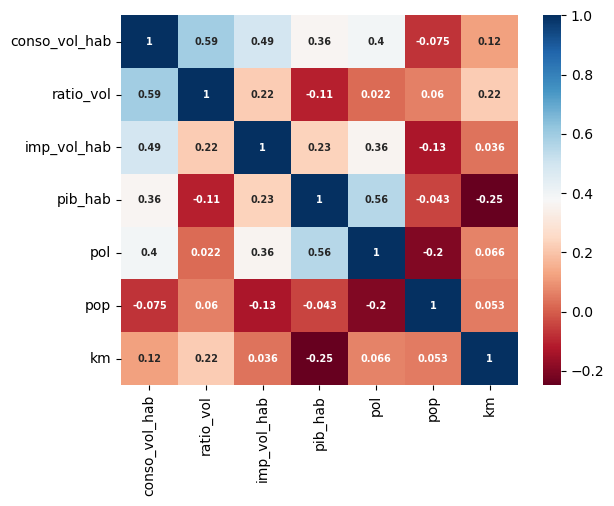

<Figure size 1000x800 with 0 Axes>

In [12]:
heatmap(cp, annot=True, cmap="RdBu",annot_kws={"size": 7, "weight": "bold"})
plt.figure(figsize = (10,8))
plt.show()

On exporte ensuite le dataframe sous format CSV qui nous servira pour les clusterings :

In [13]:
df.to_csv("df1.csv")